# Benchmarking
The purpose of this notebook is to benchmark the performance of see-classify on different datasets.
The figures in this notebook were generated by see-classify with has `1729ec21b8e884e61da78fe03b714cc7dd443692`.

To generate data files, run:
- for sklearn
```bash
sbatch run_generate_gensearch_data.sb -m sklearn -n 10 -p 10
```
- for dhahri
```bash
sbatch run_generate_gensearch_data.sb -m dhahri -n 100 -p 10
```
to generate files for genetic search using 10 generations and population size of 10
for the sklearn tutorial and 100 generations with population size of 10 respectively
for the Breast Cancer Wisconsin (Diagnostic) Dataset.

The `-n` and `-p` flags control number of generations and population sizes
respectively.

Set output filenames to build figures

In [ ]:
population_datasets = [
    "moons_population_10_10_30214803.csv",
    "circles_population_10_10_30214804.csv",
    "linearly_separable_population_10_10_30214802.csv",
]

hof_datasets = [
    "moons_hof_10_10_30214803.csv",
    "circles_hof_10_10_30214804.csv",
    "linearly_separable_hof_10_10_30214802.csv",
]

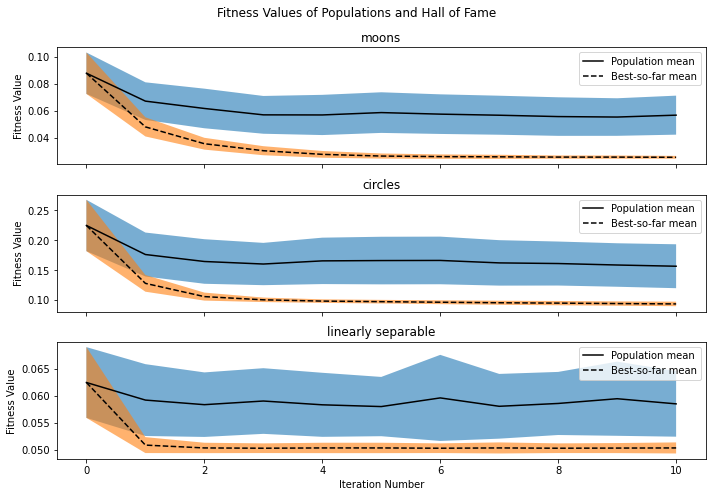

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# TODO: Remove slurm id

ds_names = ["moons", "circles", "linearly separable"]

fig, axs = plt.subplots(3, sharex=True, figsize=(10, 7))

fig.suptitle("Fitness Values of Populations and Top 10 Solutions so far")

for idx in range(3):
    hof_df = pd.read_csv(hof_datasets[idx], header=None, delimiter=";")
    population_df = pd.read_csv(population_datasets[idx], header=None, delimiter=";")

    # Using a line plot we show how generational fitness average changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, 11))

    # trials x generation number
    trial_means = np.zeros((100, 11))

    for i in range(0, 100):
        sample = population_df[10 * 11 * i : 10 * 11 * (i + 1)]
        for j in range(0, 11):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            trial_means[i, j] = rows[2].mean()
            # trial_means[i,j] = np.median(rows[2])

    means_of_means = np.zeros(11)
    for i in range(11):
        means_of_means[i] = trial_means[:, i].mean()
        # means_of_means[i] = np.median(trial_means[:,i])

    std_sample_means = np.zeros(11)
    for i in range(11):
        rows = population_df[population_df[0] == i]
        pop_std = rows[2].std()
        std_sample_means[i] = pop_std / np.sqrt(10)

    # Using a line plot we show how generational fitness hof changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, 11))

    # trials x generation number
    hof_trial_means = np.zeros((100, 11))

    for i in range(0, 100):
        sample = hof_df[10 * 11 * i : 10 * 11 * (i + 1)]
        for j in range(0, 11):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            hof_trial_means[i, j] = rows[2].mean()
            # hof_trial_means[i,j] = np.median(rows[2])

    hof_std_sample_means = np.zeros(11)
    for i in range(11):
        rows = hof_df[population_df[0] == i]
        pop_std = rows[2].std()
        hof_std_sample_means[i] = pop_std / np.sqrt(10)

    hof_means_of_means = np.zeros(11)
    for i in range(11):
        hof_means_of_means[i] = hof_trial_means[:, i].mean()
        # hof_means_of_means[i] = np.median(hof_trial_means[:,i])

    alpha = 0.6
    axs[idx].plot(generations, means_of_means, "k-", label="Population mean")
    axs[idx].fill_between(
        generations,
        means_of_means - 1 * std_sample_means,
        means_of_means + 1 * std_sample_means,
        alpha=alpha,
    )
    axs[idx].plot(generations, hof_means_of_means, "k--", label="Top 10 Best-so-far mean")
    axs[idx].fill_between(
        generations,
        hof_means_of_means - 1 * hof_std_sample_means,
        hof_means_of_means + 1 * hof_std_sample_means,
        alpha=alpha,
    )

    axs[idx].set_title(ds_names[idx])

    axs[idx].legend()

    axs[idx].set_ylabel("Fitness Value")
    if idx == 2:
        axs[idx].set_xlabel("Iteration Number")

plt.tight_layout()

Set filenames

In [ ]:
slurm_id = 30323530

hof_datasets = [f"dhahri_2019_hof_100_10_{slurm_id}.csv"]
population_datasets = [f"dhahri_2019_population_100_10_{slurm_id}.csv"]

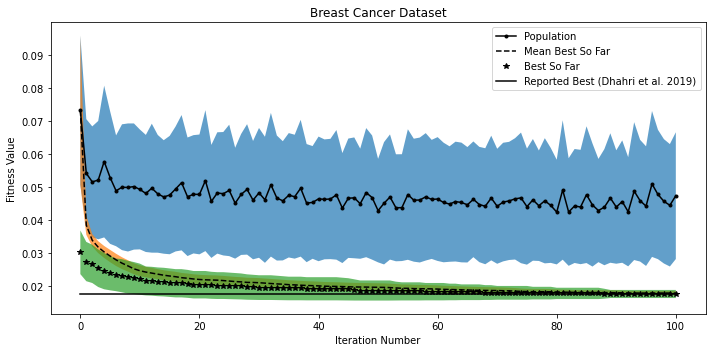

In [2]:
# Repeat above figure for breast cancer dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

num_gen = 100
pop_size = 10

fig, axs = plt.subplots(1, sharex=True, figsize=(10, 5))

for idx in range(1):
    slice_gen = (
        100  # allows us to plot the range between 0 and a specific generation number
    )
    hof_df = pd.read_csv(hof_datasets[idx], header=None, delimiter=";")
    population_df = pd.read_csv(population_datasets[idx], header=None, delimiter=";")

    # Using a line plot we show how generational fitness average changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, slice_gen + 1))

    # trials x generation number
    trial_means = np.zeros((100, slice_gen + 1))

    for i in range(0, 100):
        sample = population_df[
            (num_gen + 1) * (pop_size) * i : (num_gen + 1) * (pop_size) * (i + 1)
        ]
        for j in range(0, slice_gen + 1):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            trial_means[i, j] = rows[2].mean()
            # trial_means[i,j] = np.median(rows[2])

    means_of_means = np.zeros(slice_gen + 1)
    for i in range(slice_gen + 1):
        means_of_means[i] = trial_means[:, i].mean()
        # means_of_means[i] = np.median(trial_means[:,i])

    std_sample_means = np.zeros(slice_gen + 1)
    for i in range(slice_gen + 1):
        rows = population_df[population_df[0] == i]
        pop_std = rows[2].std()
        std_sample_means[i] = pop_std / np.sqrt(pop_size)

    # Using a line plot we show how generational fitness hof changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, slice_gen + 1))

    # Trials x generation number
    hof_trial_means = np.zeros((100, slice_gen + 1))

    for i in range(0, 100):
        sample = hof_df[
            (num_gen + 1) * (pop_size) * i : (num_gen + 1) * (pop_size) * (i + 1)
        ]
        for j in range(0, slice_gen + 1):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            hof_trial_means[i, j] = rows[2].mean()
            # hof_trial_means[i,j] = np.median(rows[2])

    hof_std_sample_means = np.zeros(slice_gen + 1)
    for i in range(slice_gen + 1):
        rows = hof_df[population_df[0] == i]
        pop_std = rows[2].std()
        hof_std_sample_means[i] = pop_std / np.sqrt(pop_size)

    hof_means_of_means = np.zeros(slice_gen + 1)
    for i in range(slice_gen + 1):
        hof_means_of_means[i] = hof_trial_means[:, i].mean()
        # hof_means_of_means[i] = np.median(hof_trial_means[:,i])

    # Trials x generation number
    hof_trial_mins = np.zeros((100, slice_gen + 1))

    for i in range(0, 100):
        sample = population_df[
            (num_gen + 1) * (pop_size) * i : (num_gen + 1) * (pop_size) * (i + 1)
        ]
        # sample = hof_df[10*11*i: 10*11*(i+1)]
        for j in range(0, slice_gen + 1):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            hof_trial_mins[i, j] = rows[2].min()

    hof_means_of_mins = np.zeros(slice_gen + 1)
    for i in range(slice_gen + 1):
        hof_means_of_mins[i] = hof_trial_mins[:, i].mean()
        # hof_means_of_mins[i] = np.median(hof_trial_mins[:,i])

    hof_std_of_mins = np.zeros(slice_gen + 1)
    for i in range(slice_gen + 1):
        hof_std_of_mins[i] = hof_trial_mins[:, i].std()

    alpha = 0.7
    axs.plot(generations, means_of_means, "k.-", label="Population")
    axs.fill_between(
        generations,
        means_of_means - 1 * std_sample_means,
        means_of_means + 1 * std_sample_means,
        alpha=alpha,
    )
    axs.plot(generations, hof_means_of_means, "k--", label="Mean Best So Far")
    axs.fill_between(
        generations,
        hof_means_of_means - 1 * hof_std_sample_means,
        hof_means_of_means + 1 * hof_std_sample_means,
        alpha=alpha,
    )

    axs.plot(generations, hof_means_of_mins, "k*", label="Best So Far")
    axs.fill_between(
        generations,
        hof_means_of_mins - 1 * hof_std_of_mins,
        hof_means_of_mins + 1 * hof_std_of_mins,
        alpha=alpha,
    )

    axs.plot(
        generations,
        np.repeat(1 - 0.9824, slice_gen + 1),
        "k-",
        label="Reported Best (Dhahri et al. 2019)",
    )

    axs.legend()

    axs.set_title("Breast Cancer Dataset")
    axs.set_xlabel("Iteration Number")
    axs.set_ylabel("Fitness Value")

plt.tight_layout()